In [80]:
import pandas as pd
import json

#LECTURA DEL FICHERO DE BLOQUES
block_data = {}

with open('data/blocks.json', 'r') as f:
    for line in f:
        df_line = json.loads(line)
        block_data[df_line['hash']] = {'size': df_line['size'], 'tx': df_line['tx'],
                                       'time': df_line['time'], 'nTx': df_line['nTx'],
                                       'previousblockhash': df_line['previousblockhash']}

In [123]:
print(block_data['0000000000000000000b42a57bf047247c5bfe67a8adeeb1bd51e440d0632fb2']['nTx'])

976


In [83]:
# ARCHIVO DE LECTURA DE TXS
# Creamos un diccionario vacío que almacenará la información deseada del input
txs_data = {}

# Dado que la ubicación del archivo será fija, podemos pasar directamente el path a la función
with open('data/txs.json', 'r') as f:
    for line in f:
        df_line = json.loads(line)
        # Inicializamos una lista vacía donde guardaremos todos los valores "values"
        # de cada uno de los elementos del "vout" que contiene una transacción
        # Para cada línea del input, se pondrá a cero
        values = []

        # Iteramos sobre vout para obtener los values
        for i in df_line['vout']:
            values.append(i['value'])  # Lo añadimos al ventor inicializado antes

        # Almacenamos la información que deseamos en el diccionario previamente creado
        # La key del diccionario será el identificador de cada transacción "txid"
        # El contenido de cada key será un diccionario con los siguientes items:
        #    - el hash identificativo del bloque al que pertenece la transacción
        #    - una lista con todos los valores de "vout" de las transacciones
        #    - el tiempo registrado de inicio de la transacción
        txs_data[df_line['txid']] = {'blockhash': df_line['blockhash'],
                                     'values': values,
                                     'time': df_line['time']}

In [84]:
counter = 0
for key in txs_data:
    counter += 1
    print(key)
    if counter == 40:
        break

059c99edf8ed1b3301cf0c24e2a291017071d635eb9fa20819cfa880345bf929
cbffdaba9ceaa9e34bc415f68f77d072dedbe7eecee52caf13d8f3e0293b5934
9a8c010365cf7dfbd8807a85a8c0009d1866897f14480d9d01f4ae2ccac83464
de037e4389e29f0f4f84df3507918c79e85b6441e7f10a2f274da0bba90707fc
01173f28632a0c21f3aca0b2263702fbbf6b7efa9f831a37ada3effaeba361dc
a23e51899b8621eb9813d2a8f940b02fac61b3e9422f3d60863549d5754c8cc3
8b77e99bc5fd3006124d71781a22da132f4d237b2eff7926819b67f878fafb23
df2a69c756956931c584acfdb60870c46da7827ff696bb7c59d76c82f1b41a0f
7b9e6cd2c9614e81177bf8b7f4e954c928c9e8eea3e70aac78e9b0638690324d
3860e42d8bcfe4d4d943c4db590364de3e5d86af56962f91c30c1d79ad585242
a632ee9456072a6b97a272d77dcab35cffc33d54499b2932feaf97935e0c0c9f
3c4a5a17a788de27e0c7e370175b28b4c0b5dd8e8aaeb0850a51cab48fc88b6e
5aef142f9edcda14437b9c87c0f6afa542770c7a0e4f078975166382fa322bd1
090486f986f2032e2baebe737e86c59d141c858db3673b1fd5daa24b380e82d4
6c57d80adc1a36136c3cbaba067616371d8ff1bbeb7142f04f542434d0a72511
2cac07f63e5c0d80d2af0a59c

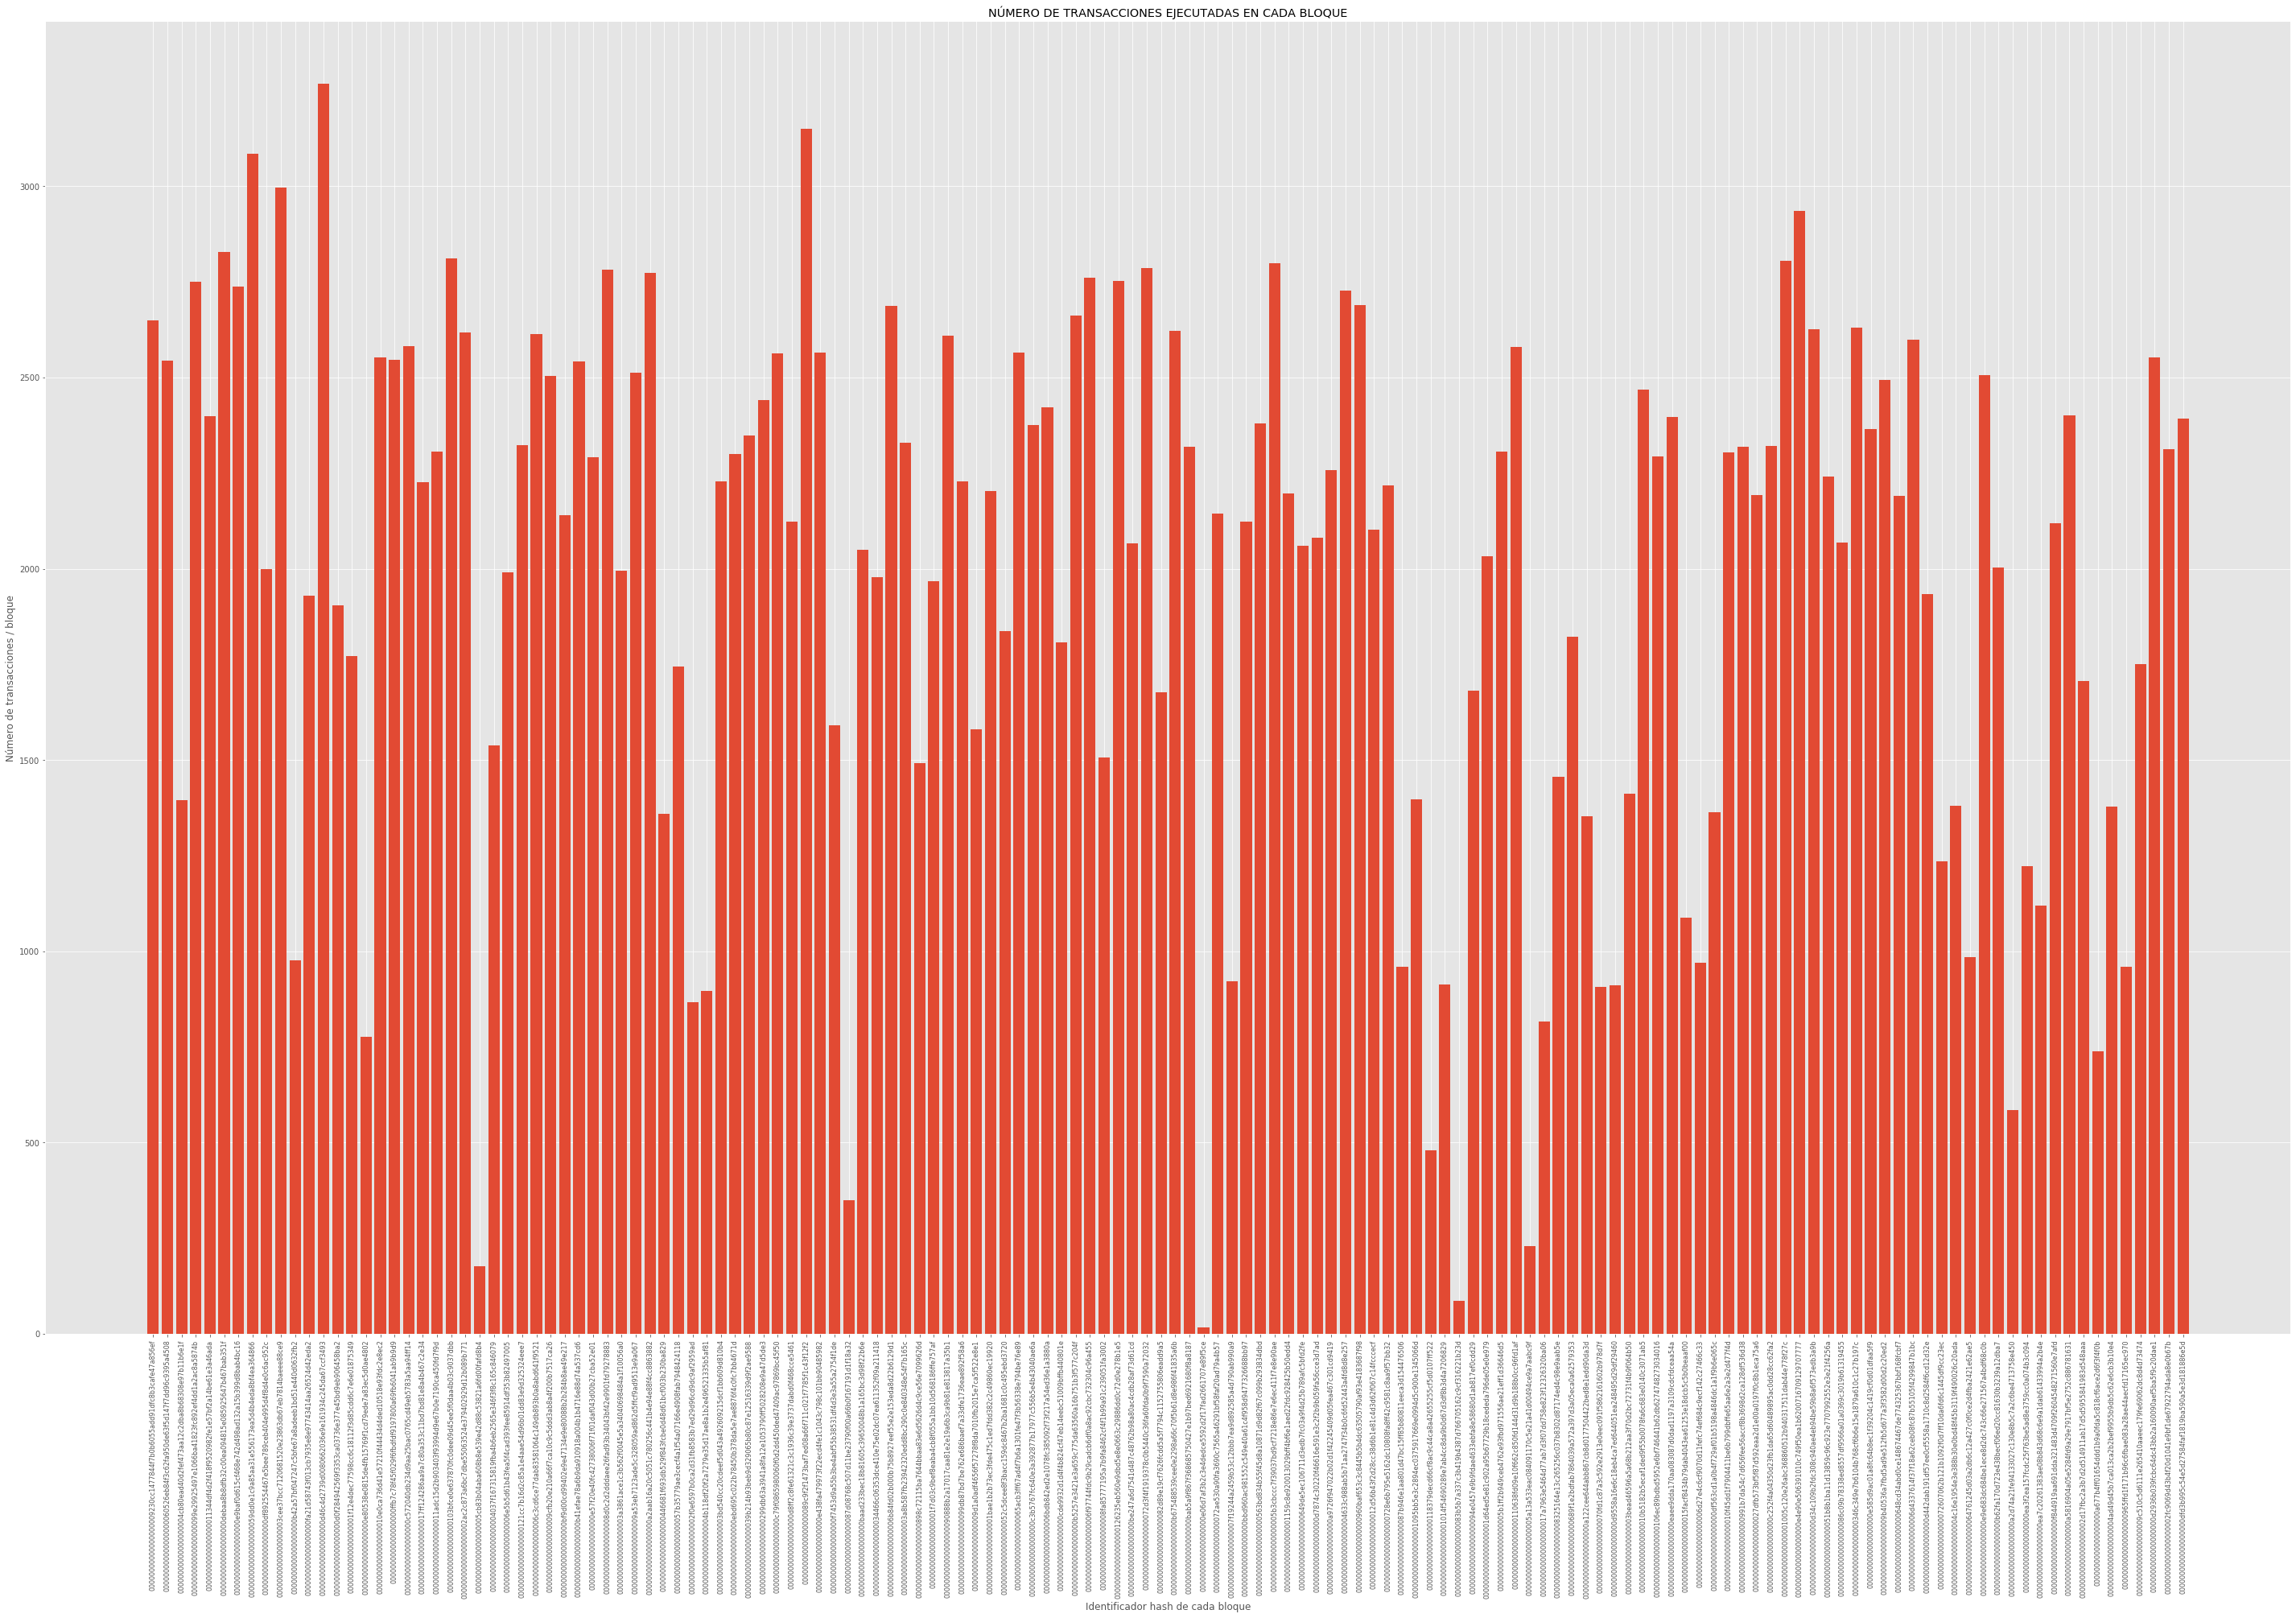

In [121]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(55,30))
plt.bar(x, y)
#plt.xticks([i for i in range(len(x))]) 
plt.xticks(range(len(x)), x, fontsize=8, rotation=90)
plt.xlabel('Identificador hash de cada bloque')
plt.ylabel('Número de transacciones / bloque')
plt.title('NÚMERO DE TRANSACCIONES EJECUTADAS EN CADA BLOQUE')
plt.savefig('img/numtransacciones.png', dpi = 100)
plt.show()

El bloque '00000000000000000009230cc1477844f7b0b6055add91dfc8b3cafe47a856ef' tiene 	2650	 transacciones
El bloque '000000000000000000060526eb84f3c62fa950de63f5d147f7dd96c9395a4508' tiene 	2543	 transacciones
El bloque '00000000000000000004cb80ead40d2fef473aa12c2dba8b68308e97b11b6e1f' tiene 	1395	 transacciones
El bloque '000000000000000000099e29925497e1066ba41823fc892ef4dd1a2ac8a5874b' tiene 	2751	 transacciones
El bloque '00000000000000000011344df4d2f418f9520982fe1e57bf2a14be61e3a46ada' tiene 	2398	 transacciones
El bloque '0000000000000000000debaa8b8dfb32c00ea094815e085925647b467bab351f' tiene 	2827	 transacciones
El bloque '0000000000000000000e9baf0d615cf468e742d498ad132a15b399d8bab4bc16' tiene 	2737	 transacciones
El bloque '000000000000000000059dd0e1c9a85aa31e556173ea5d4b4eda8bf4ea364866' tiene 	3084	 transacciones
El bloque '0000000000000000000df892554467e5bee789ceb404e995d4f8d4e0c6ac952c' tiene 	1998	 transacciones
El bloque '00000000000000000003cee37bcc7120681520e23863db67eb781

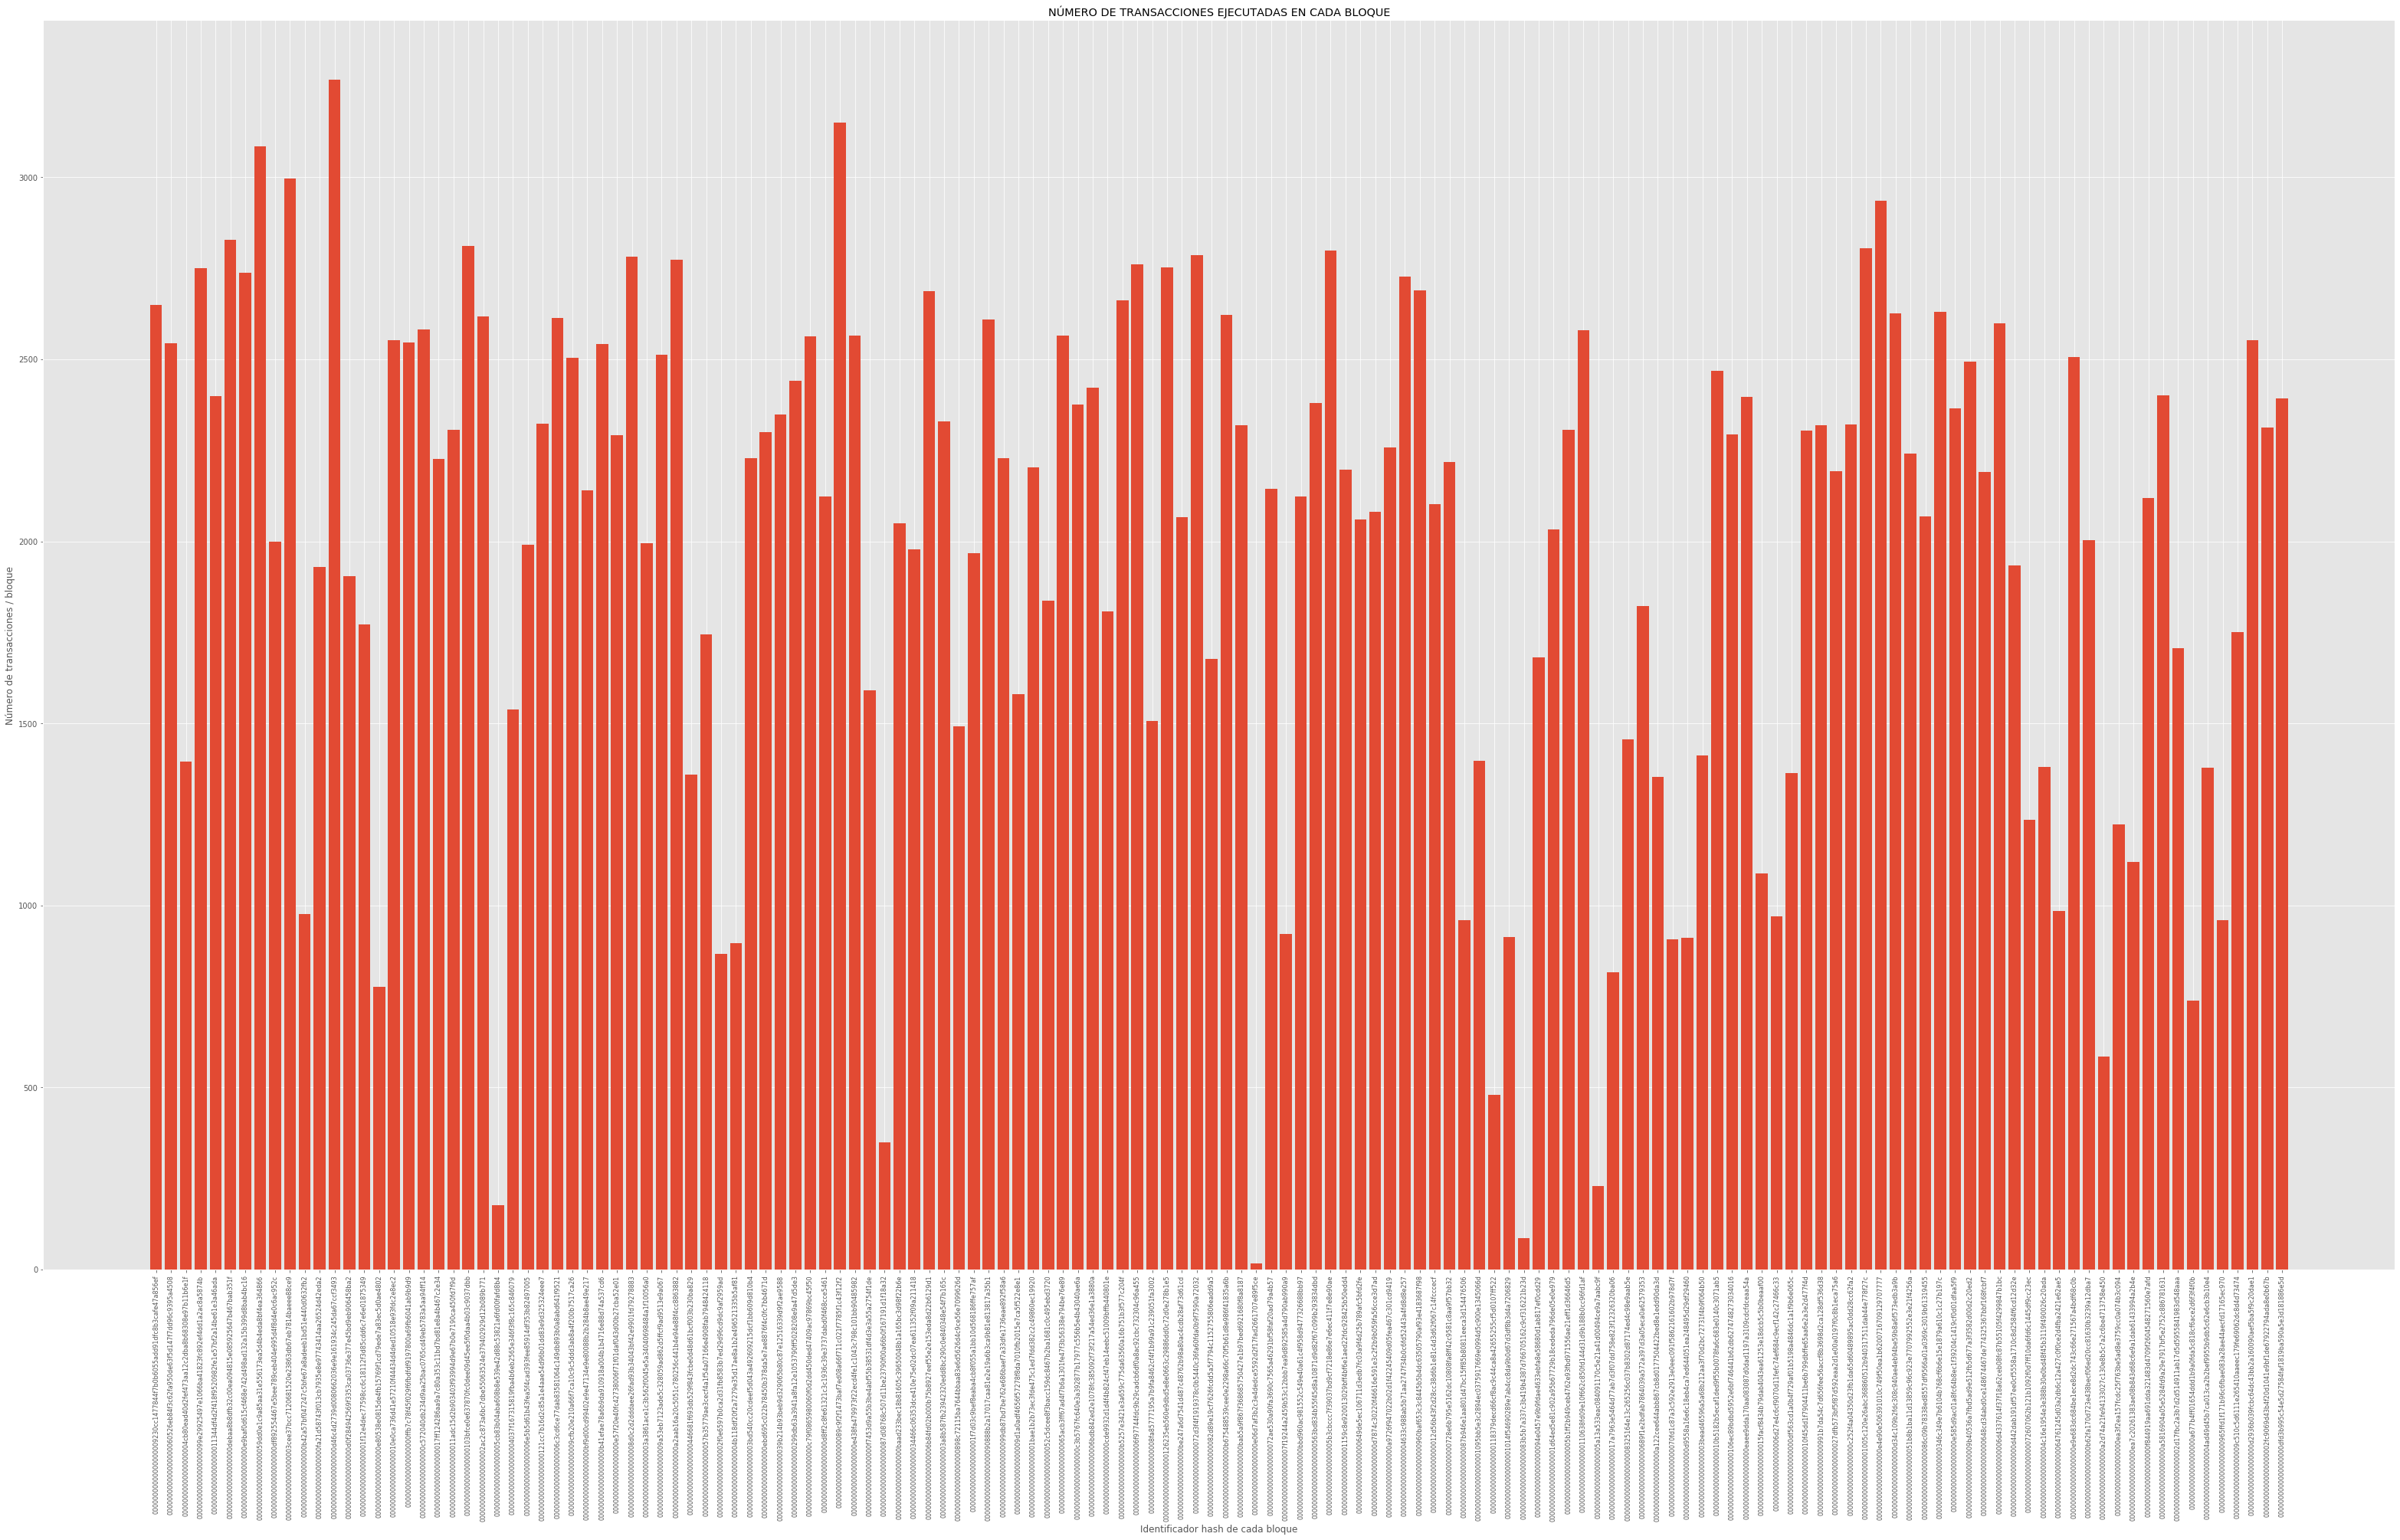

In [128]:
import matplotlib.pyplot as plt

def num_transacciones(data, representar='N'):
    '''
    La  función analiza los datos de bloques y presenta por pantalla un mensaje
    para cada bloque donde se expone el número de transacciones producidas
    Además, se incluye la representación gráfica de los resultados, por defecto
    se crea una imagen png en la carpeta "img". Si el argumento de entrada
    eje x y eje y.
    
    :param  blocks_data:
            representar: 'Y' la función representa por pantalla la gráfica junto
                         al mensaje.
                         'N' (valor por defecto) la función no representa la
                         gráfica junto al mensaje
    
    :return mensaje por pantalla con info sobre bloque y num. transacciones
            'numtransacciones.png' en la carpeta de proyecto 'img'
    '''
    # Creamos dos listas vacias, que serán los futuros ejes de los gráficos
    x = []
    y = []

    # Iteramos para cada elemento del diccionario de entrada
    for i in data:
        # Añadimos la información a las listas de ejes
        x.append(i)
        y.append(data[i]['nTx'])

        # Imprimimos por pantalla un mensaje donde se expone el bloque analizado
        # y el número de transacciones ocurridas en él
        print("El bloque '{}' tiene \t{}\t transacciones".format(i, data[i]['nTx']))

    # Representamos gráficamente los resultados
    plt.style.use('ggplot')  # Utilizaremos el tema ggplot

    # Definimos un tamaño que nos resulte cómodo de visualizar
    fig = plt.figure(figsize=(55, 30))
    plt.bar(x, y)
    plt.xticks(range(len(x)), x, fontsize=8, rotation=90)
    plt.xlabel('Identificador hash de cada bloque')
    plt.ylabel('Número de transacciones / bloque')
    plt.title('NÚMERO DE TRANSACCIONES EJECUTADAS EN CADA BLOQUE')
    plt.savefig('img/numtransacciones.png', dpi=100)
    
    # Analizo el parámetro de entrada para estudiar si representamos la gráfica
    if representar == 'N':
        plt.close(fig)
    else:    
        plt.show()
        plt.close(fig)
    return

num_transacciones(block_data, 'Y')

In [149]:
# VALOR ACUMULADO TRANSACCIONES
def valor_acumulado_txs(block_data, txs_data, representar='N'):
    
    block_x = []
    valor_acumulado_y = []
    
    for i in block_data:
        value = []
        
        for j in block_data[i]['tx']:
            value.extend(txs_data[j]['values'])
            
        
        acum_value = sum(value)
        block_x.append(i)
        valor_acumulado_y.append(acum_value)
        print("El valor acumulado de las transacciones para el bloque '{}' es {}"
              .format(i, acum_value))

    return

In [166]:
def valor_acumulado_txs(block_data, txs_data, representar='N'):
    '''

    :param block_data: diccionario con la información de bloques (resultante de ejecutar
                        la función de lectura.
    :param txs_data: diccionario con la información de las transacciones (resultante de
                        ejecutar la función de lectura
    :param representar: parámetro que indica si deseamos representar la gráfica
                    'Y': la función representa por pantalla la gráfica junto al mensaje.
                    'N' (valor por defecto) la función no representa la gráfica
    :return: mensaje por pantalla con info sobre bloque y valor acumulado de las transacciones
            'valoracumulado.png' en la carpeta de proyecto 'img' con los resultados
    '''
    # Inicializo dos listas a las cuales les iremos insertando la información
    # del valor acumulado, con el objetivo de representar gráficamente los
    # resultados
    block_x = []
    valor_acumulado_y = []
    # Itero para cada bloque
    for i in block_data:
        # Para cada bloque inicializo una lista vacia donde acumularemos los valores
        # de cada transacción
        value = []
        # Itero para cada transacción del bloque i
        for j in block_data[i]['tx']:
            # Para cada transacción busco la lista de "values" en el fichero de txs
            # y se la inserto a la lista "value"
            value.extend(txs_data[j]['values'])

        # Una vez iterado por todas las transacciones de un bloque, realizo la suma
        # de los valores de cada una
        acum_value = sum(value)

        # Añado la información a las listas que representarán cada eje
        block_x.append(i)
        valor_acumulado_y.append(acum_value)

        # Imprimo por pantalla un mensaje donde se muestra para cada bloque, el valor
        # acumulado de las transacciones
        print("El valor acumulado de las transacciones para el bloque '{}' es {}"
              .format(i, acum_value))

    # Representamos gráficamente los resultados
    plt.style.use('ggplot')  # Utilizaremos el tema ggplot

    # Definimos un tamaño que nos resulte cómodo de visualizar
    fig = plt.figure(figsize=(60, 40))
    plt.bar(block_x, valor_acumulado_y)
    plt.xticks(range(len(block_x)), block_x, fontsize=8, rotation=90)
    plt.xlabel('Identificador hash de cada bloque',fontsize=18)
    plt.ylabel('Valor acumulado de las transacciones / bloque', fontsize=18)
    plt.title('VALOR ACUMULADO DE LAS TRANSACCIONES EJECUTADAS EN CADA BLOQUE',fontsize=30)
    plt.savefig('img/valoracumulado.png', dpi=100)

    # Analizo el parámetro de entrada para estudiar si representamos la gráfica
    if representar == 'N':
        plt.close(fig)
    else:
        plt.show()
        plt.close(fig)
    return

El valor acumulado de las transacciones para el bloque '00000000000000000009230cc1477844f7b0b6055add91dfc8b3cafe47a856ef' es 11383.94878785994
El valor acumulado de las transacciones para el bloque '000000000000000000060526eb84f3c62fa950de63f5d147f7dd96c9395a4508' es 17308.05367398
El valor acumulado de las transacciones para el bloque '00000000000000000004cb80ead40d2fef473aa12c2dba8b68308e97b11b6e1f' es 3622.77287699001
El valor acumulado de las transacciones para el bloque '000000000000000000099e29925497e1066ba41823fc892ef4dd1a2ac8a5874b' es 9633.670801730015
El valor acumulado de las transacciones para el bloque '00000000000000000011344df4d2f418f9520982fe1e57bf2a14be61e3a46ada' es 14826.627796970031
El valor acumulado de las transacciones para el bloque '0000000000000000000debaa8b8dfb32c00ea094815e085925647b467bab351f' es 7259.995884540002
El valor acumulado de las transacciones para el bloque '0000000000000000000e9baf0d615cf468e742d498ad132a15b399d8bab4bc16' es 11203.150786679984
E

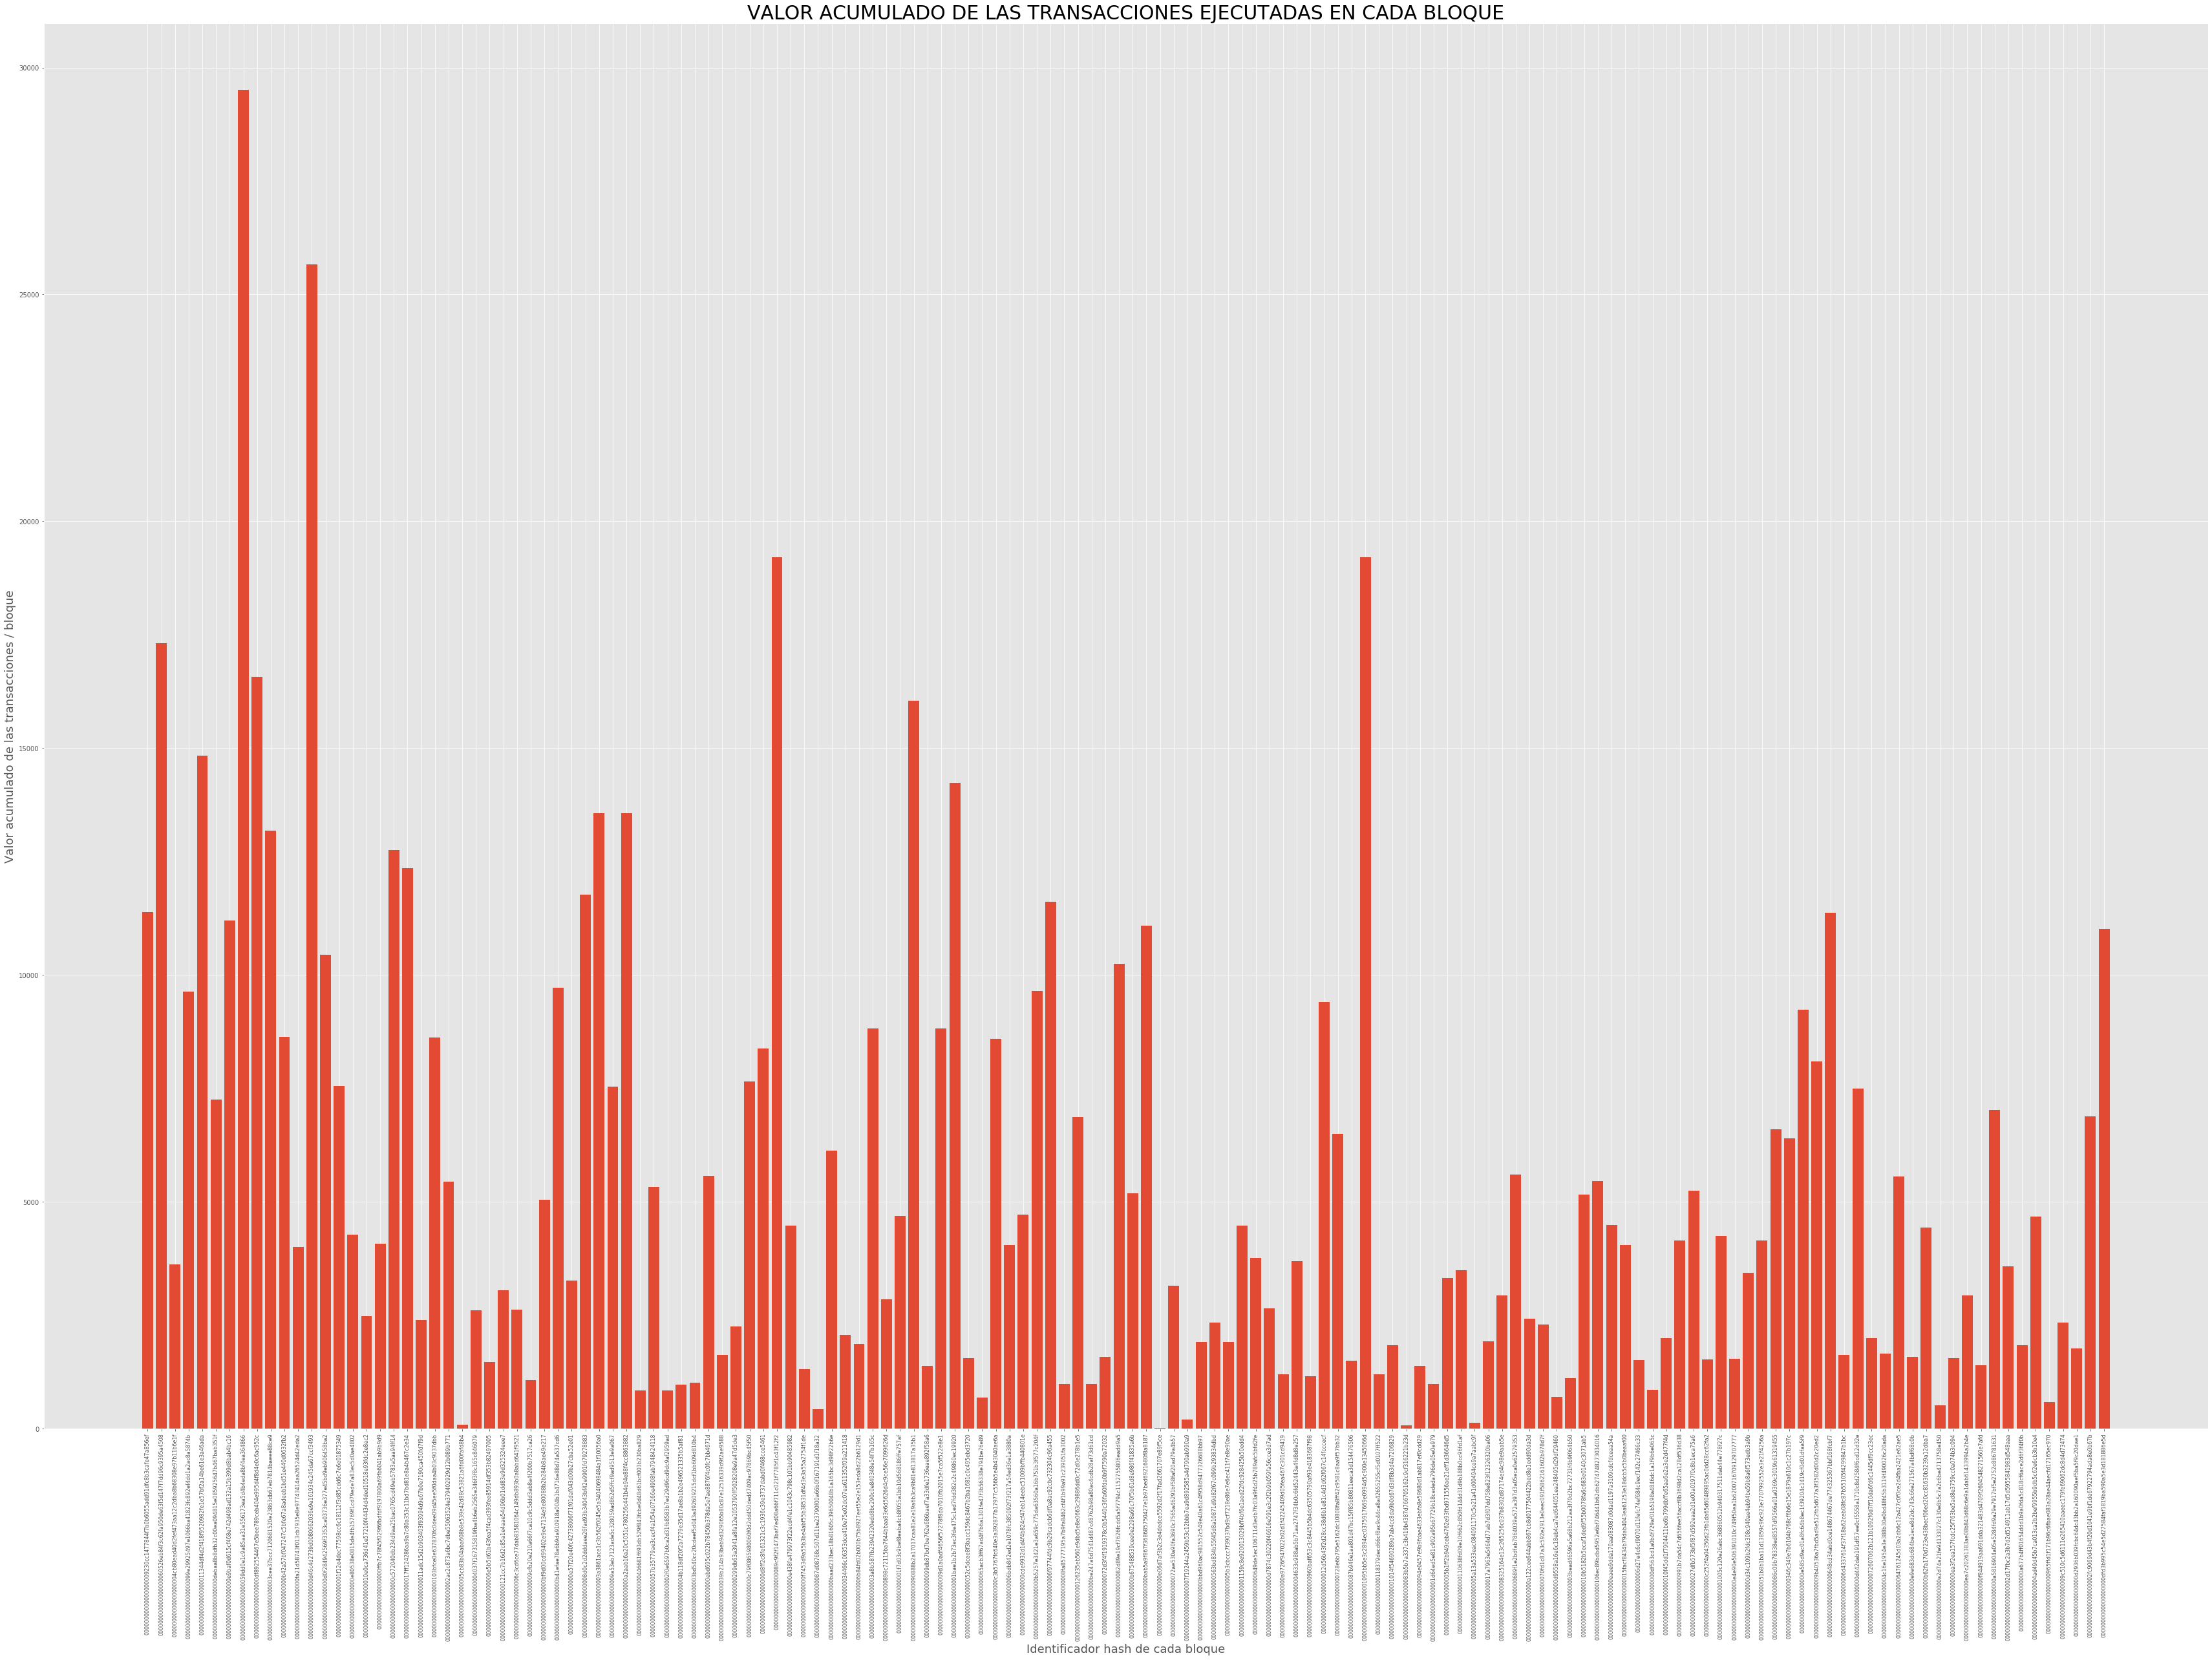

In [167]:
valor_acumulado_txs(block_data, txs_data, 'Y')

In [210]:
import datetime


def tiempo_medio_bloques(block_data, representar='N'):
    '''

    :param block_data: diccionario con la información de bloques (resultante de ejecutar
                        la función de lectura.
    :param representar: 'Y' la función representa por pantalla la gráfica junto
                         al mensaje.
                         'N' (valor por defecto) la función no representa la
                         gráfica junto al mensaje
    :return: mensaje por pantalla con info sobre bloques consecutivos y tiempo transcurrido
                entre ellos en segundos
            'tiempobloquesconsecutivos.png' en la carpeta de proyecto 'img'
    '''

    # Inicializamos dos listas vacias que nos servirán como ejes para la representación
    # gráfica de los resultados
    block_x = []
    delta_time_y = []


    # Iteramos para cada uno de los bloques
    for i in block_data:
        # Obtenemos la fecha de inicio del bloque
        tiempo_actual = block_data[i]['time']
        tiempo_actual = datetime.datetime.fromtimestamp(tiempo_actual)

        # Para obtener la fecha de inicio del bloque anterior
        # Obtenemos el bloque previo al actual
        bloque_previo = block_data[i]['previousblockhash']
        # Obtenemos cuando se ejecutó

        try:
            tiempo_previo = block_data[bloque_previo]['time']
            tiempo_previo = datetime.datetime.fromtimestamp(tiempo_previo)

            # Calculamos la diferencia entre la ejecución de los bloques
            delta = tiempo_actual - tiempo_previo

            # Añadimos los datos a las listas de los ejes de representación gráfica
            block_x.append(i)
            delta_time_y.append(delta.total_seconds())

            # Mostramos el resultado por pantalla
            print("El tiempo trancurrido entre el bloque '{}' y el bloque '{}' ha sido de {} segundos"
                  .format(i, bloque_previo, delta.total_seconds()))

        except:
            print("No se dispone de tiempo de referencia previo para el bloque {}".format(i))

    # Representamos gráficamente los resultados
    plt.style.use('ggplot')  # Utilizaremos el tema ggplot

    # Definimos un tamaño que nos resulte cómodo de visualizar
    fig = plt.figure(figsize=(60, 40))
    plt.bar(block_x, delta_time_y)
    plt.xticks(range(len(block_x)), block_x, fontsize=8, rotation=90)
    # La etiqueta x solo vamos a incluir la referencia de un bloque. La referencia del anterior
    # la vamos a omitir para no saturar más aún el gráfico
    plt.xlabel('Identificador hash de cada bloque', fontsize=18)
    plt.ylabel('Diferencia de tiempos entre cada bloque consecutivo (s)', fontsize=18)
    plt.title('DIFERENCIA DE TIEMPOS ENTRE BLOQUES CONSECUTIVOS (segundos)', fontsize=30)
    plt.savefig('img/tiempobloquesconsecutivos.png', dpi=100)

    # Analizo el parámetro de entrada para estudiar si representamos la gráfica
    if representar == 'N':
        plt.close(fig)
    else:
        plt.show()
        plt.close(fig)

    return

In [211]:
tiempo_medio_bloques(block_data, 'N')

El tiempo trancurrido entre el bloque '00000000000000000009230cc1477844f7b0b6055add91dfc8b3cafe47a856ef' y el bloque '000000000000000000060526eb84f3c62fa950de63f5d147f7dd96c9395a4508' ha sido de 1612.0 segundos
El tiempo trancurrido entre el bloque '000000000000000000060526eb84f3c62fa950de63f5d147f7dd96c9395a4508' y el bloque '00000000000000000004cb80ead40d2fef473aa12c2dba8b68308e97b11b6e1f' ha sido de 93.0 segundos
El tiempo trancurrido entre el bloque '00000000000000000004cb80ead40d2fef473aa12c2dba8b68308e97b11b6e1f' y el bloque '000000000000000000099e29925497e1066ba41823fc892ef4dd1a2ac8a5874b' ha sido de 242.0 segundos
El tiempo trancurrido entre el bloque '000000000000000000099e29925497e1066ba41823fc892ef4dd1a2ac8a5874b' y el bloque '00000000000000000011344df4d2f418f9520982fe1e57bf2a14be61e3a46ada' ha sido de 1294.0 segundos
El tiempo trancurrido entre el bloque '00000000000000000011344df4d2f418f9520982fe1e57bf2a14be61e3a46ada' y el bloque '0000000000000000000debaa8b8dfb32c00ea0948

El tiempo trancurrido entre el bloque '00000000000000000009230cc1477844f7b0b6055add91dfc8b3cafe47a856ef' y el bloque '000000000000000000060526eb84f3c62fa950de63f5d147f7dd96c9395a4508' ha sido de 1591021468 - 1591019856
El tiempo trancurrido entre el bloque '000000000000000000060526eb84f3c62fa950de63f5d147f7dd96c9395a4508' y el bloque '00000000000000000004cb80ead40d2fef473aa12c2dba8b68308e97b11b6e1f' ha sido de 1591019856 - 1591019763
El tiempo trancurrido entre el bloque '00000000000000000004cb80ead40d2fef473aa12c2dba8b68308e97b11b6e1f' y el bloque '000000000000000000099e29925497e1066ba41823fc892ef4dd1a2ac8a5874b' ha sido de 1591019763 - 1591019521
El tiempo trancurrido entre el bloque '000000000000000000099e29925497e1066ba41823fc892ef4dd1a2ac8a5874b' y el bloque '00000000000000000011344df4d2f418f9520982fe1e57bf2a14be61e3a46ada' ha sido de 1591019521 - 1591018227
El tiempo trancurrido entre el bloque '00000000000000000011344df4d2f418f9520982fe1e57bf2a14be61e3a46ada' y el bloque '000000

ValueError: shape mismatch: objects cannot be broadcast to a single shape

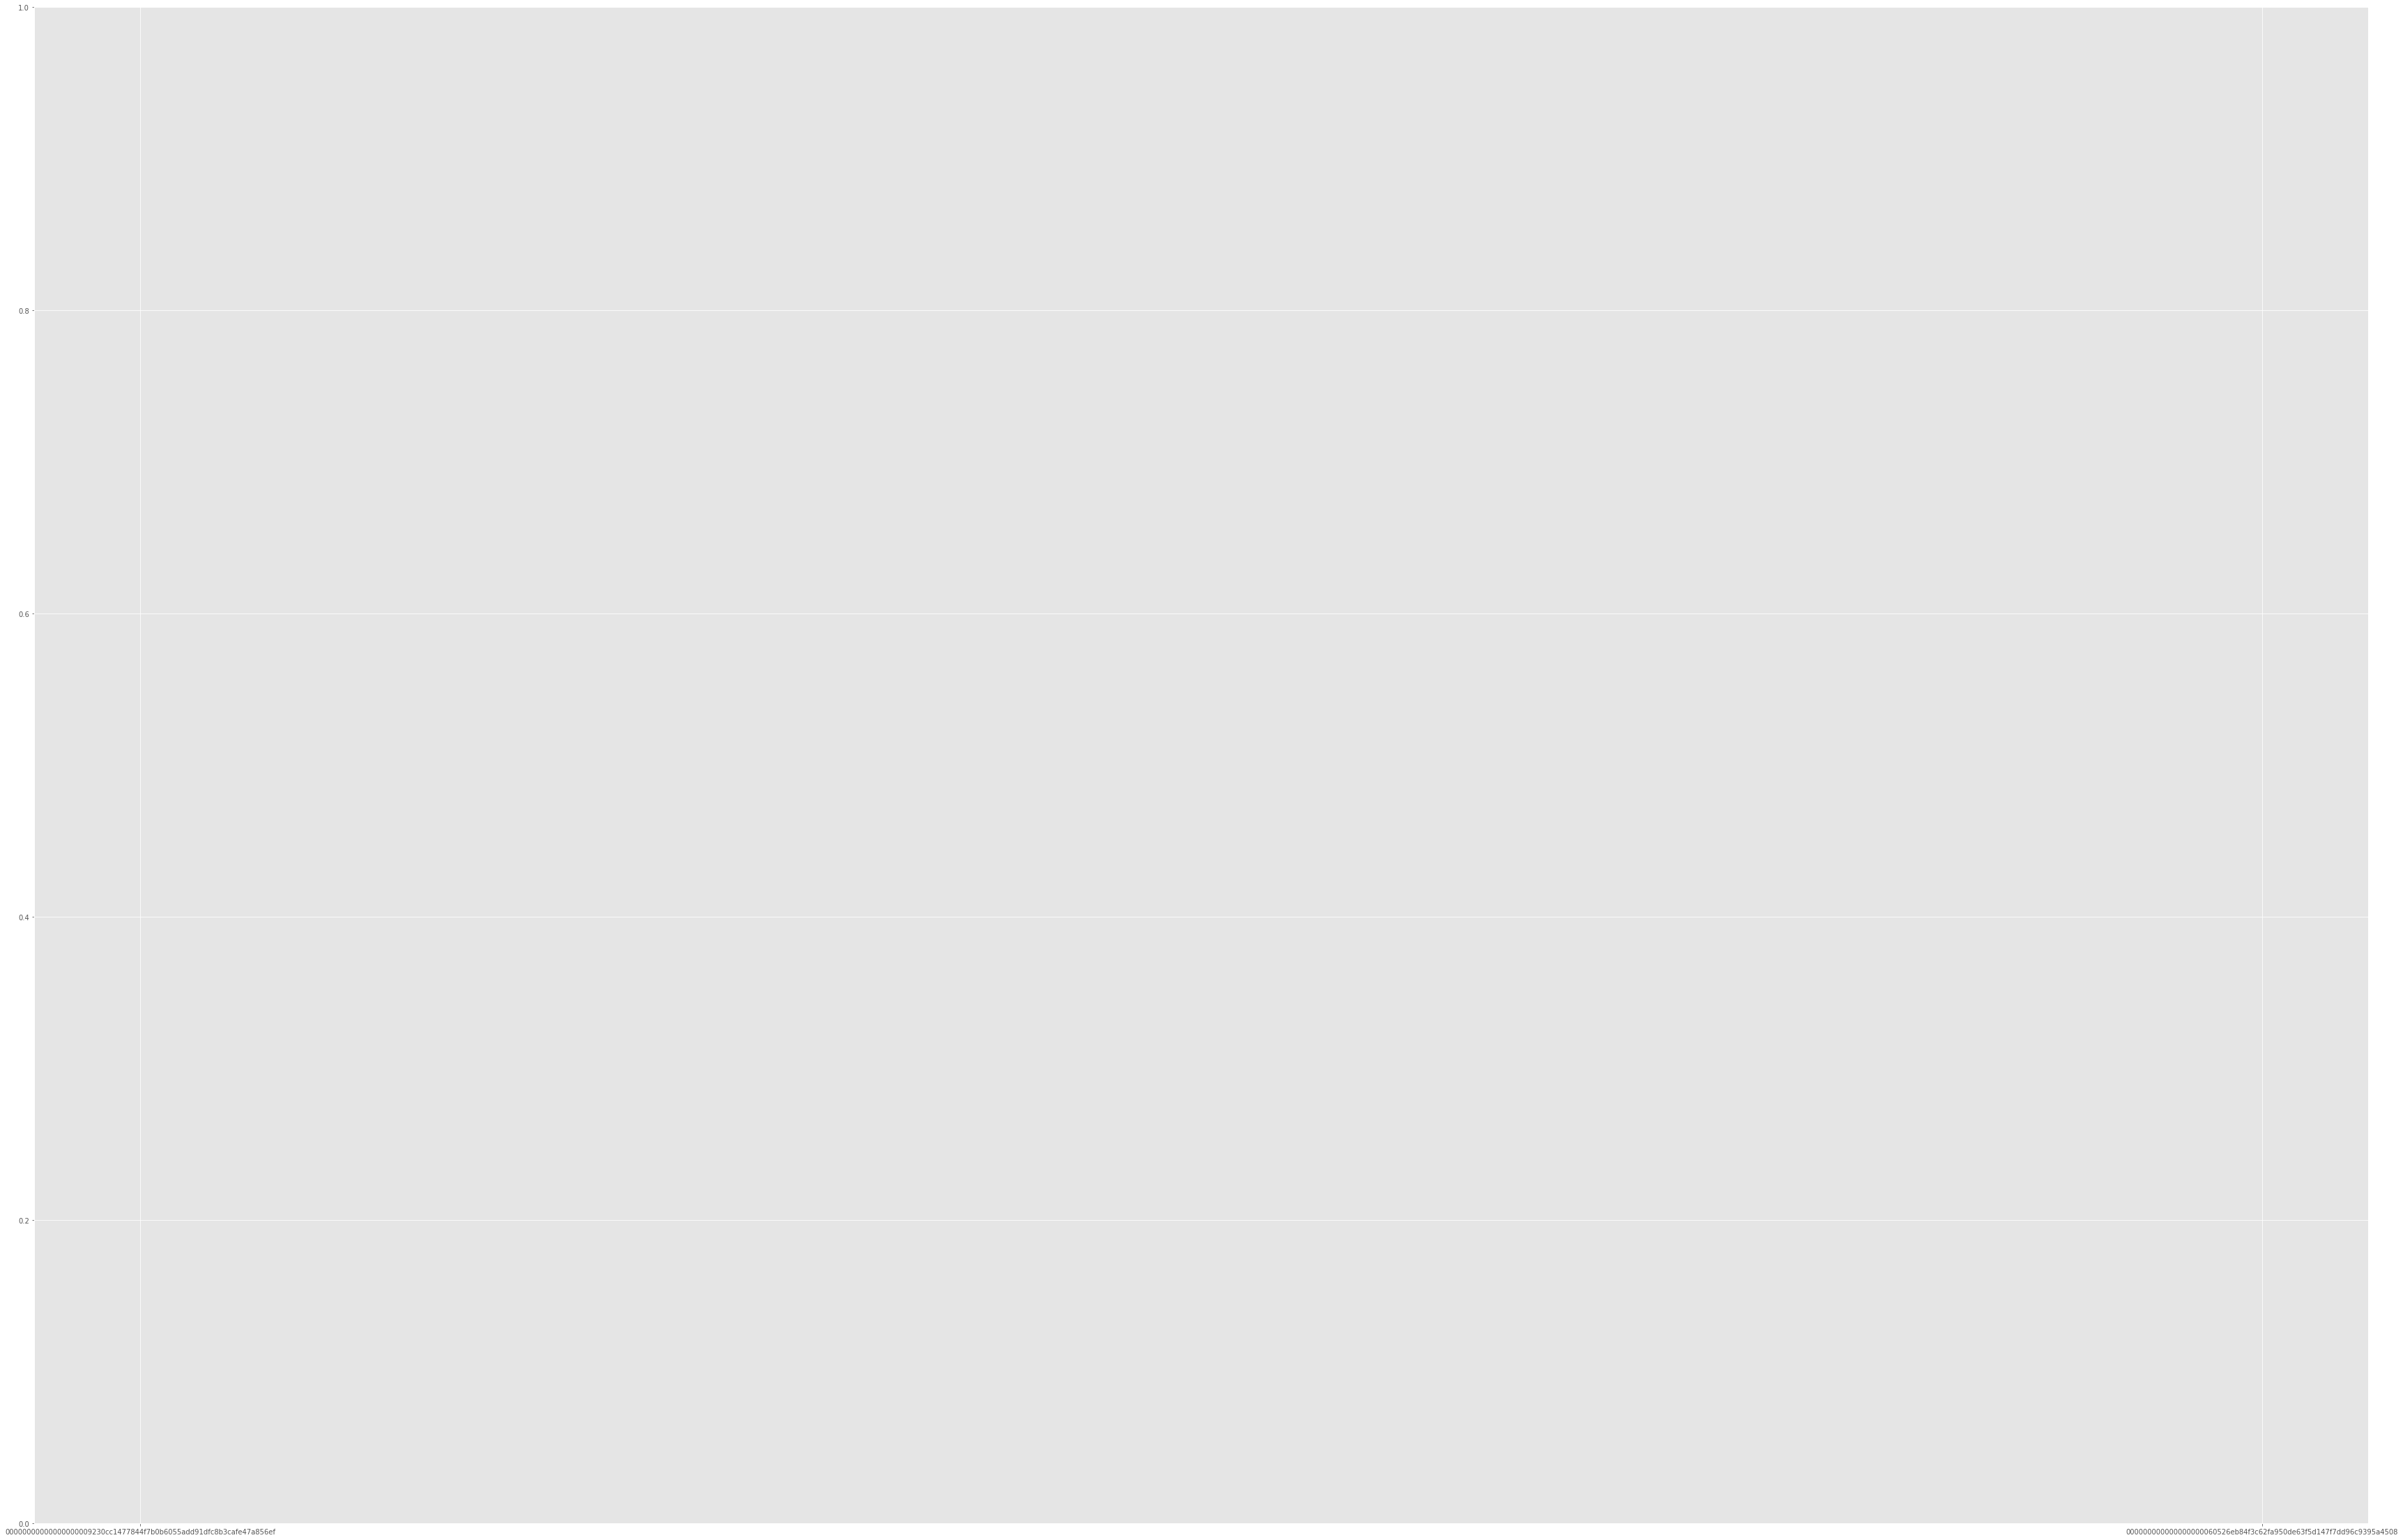

In [200]:
tiempo_medio_bloques(block_data, 'N')

In [ ]:
from __future__ import division
import datetime

d1 = 1502053449617

converted_d1 = datetime.datetime.fromtimestamp(round(d1 / 1000))
current_time_utc = datetime.datetime.utcnow()

print((current_time_utc - converted_d1))
print((current_time_utc - converted_d1).total_seconds() / 60)

In [207]:
dt1 = datetime.datetime.fromtimestamp(1591021468)
dt2 = datetime.datetime.fromtimestamp(1591019856)

print((dt1-dt2).total_seconds())
print(dt1)
print(dt2)

1612.0
2020-06-01 16:24:28
2020-06-01 15:57:36
